#Initial Setup
This section includes the mounting the drive files, installation of the packages(pm4py), import of the libraries, and the methods that will be used in the notebook

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install pm4py

In [3]:
from pm4py.objects.conversion.log import converter as log_converter 
from pm4py.objects.log.importer.xes import importer as xes_importer


In [21]:
#%%
#LIBRARIES
#Data Processing
import pandas as pd
import numpy as np
import math

#Petrinet visualization
from pm4py.visualization.petrinet import visualizer as pn_visualizer

In [22]:
def visualize(net, initial_marking, final_marking):
  # Visualise 
  gviz = pn_visualizer.apply(net, initial_marking, final_marking) 
  pn_visualizer.view(gviz)

In [13]:
path= "/content/sample_data/ArtificialPatientTreatment.csv"
#Rename columns for Process mining
#header = 0 to prevent taking column names defined in csv file as a new row
df = pd.read_csv(path, names=['case:concept:name','concept:name','org:resource','time:timestamp'], header =0) 
df

,case:concept:name,concept:name,org:resource,time:timestamp
0,patient 0,First consult,Dr. Anna,2017-01-02 11:40:11
1,patient 0,Blood test,Lab,2017-01-02 12:47:33
2,patient 0,Physical test,Nurse Jesse,2017-01-02 12:53:50
3,patient 0,Second consult,Dr. Anna,2017-01-02 16:21:06
4,patient 0,Surgery,Dr. Charlie,2017-01-05 13:23:09
...,...,...,...,...
685,patient 99,X-ray scan,Team 2,2017-05-25 11:03:27
686,patient 99,Physical test,Nurse Corey,2017-05-25 11:55:24
687,patient 99,Second consult,Dr. Anna,2017-05-29 15:12:39
688,patient 99,Medicine,Pharmacy,2017-05-29 16:17:13


In [15]:
# Convert to log format, length of the log should be equal to number of patients
log = log_converter.apply(df)
len(log) #for every patient

100

#Alpha Miner

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecatedWarning: apply is deprecated as of 2.2.5 and will be removed in 3.0.0. please use pm4py.visualization.petri_net.algorithm instead
  This is separate from the ipykernel package so we can avoid doing imports until


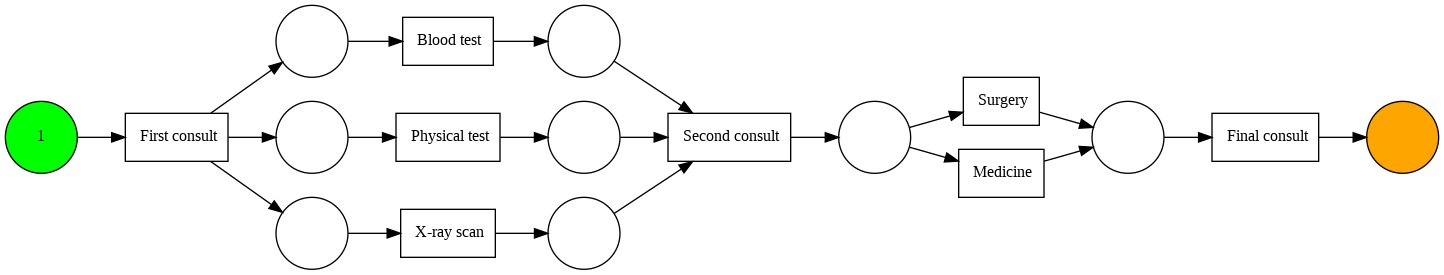

In [26]:
## Import the alpha_miner algorithm
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(log)
visualize(net,initial_marking,final_marking)

#Heuristics Miner

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecatedWarning: apply is deprecated as of 2.2.5 and will be removed in 3.0.0. please use pm4py.visualization.petri_net.algorithm instead
  This is separate from the ipykernel package so we can avoid doing imports until


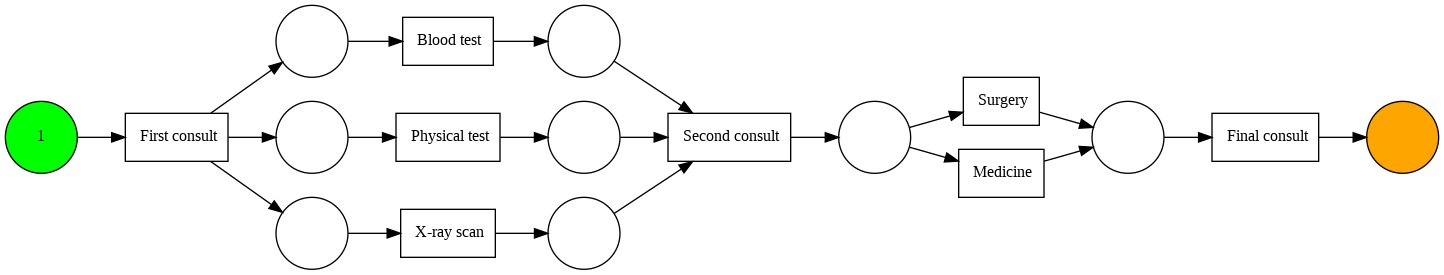

In [25]:
## Import the heuristic_miner algorithm
from pm4py.algo.discovery.heuristics import algorithm as heuristic_miner
net, initial_marking, final_marking = heuristic_miner.apply(log)
visualize(net, initial_marking, final_marking)

#Inductive Miner

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecatedWarning: apply is deprecated as of 2.2.5 and will be removed in 3.0.0. please use pm4py.visualization.petri_net.algorithm instead
  This is separate from the ipykernel package so we can avoid doing imports until


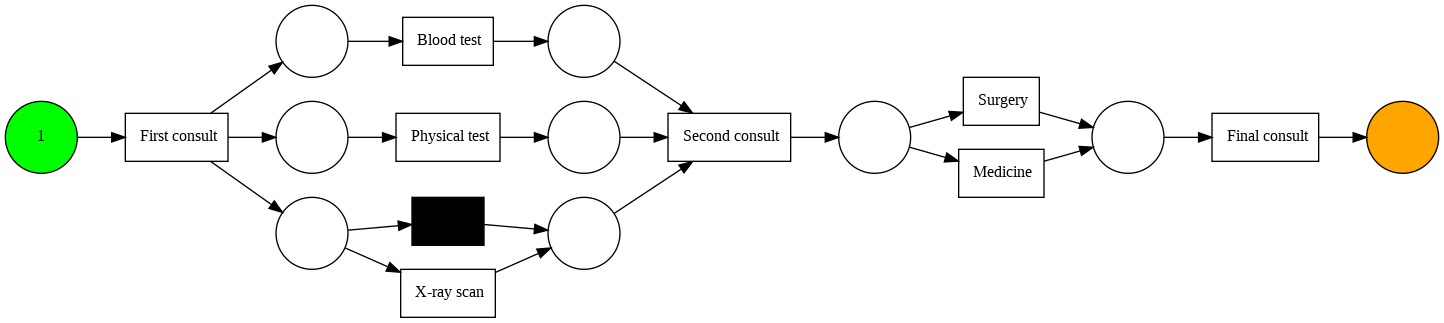

In [27]:
## Import the inductive_miner algorithm
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
net, initial_marking, final_marking = inductive_miner.apply(log)
visualize(net,initial_marking,final_marking)